In [62]:
# importing the dependencies
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , KFold, learning_curve
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import mean_absolute_error, r2_score

from joblib import load,dump

In [63]:
# loading our data
df = pd.read_csv("./Data/data.csv",sep=",")
df.drop(['Unnamed: 0'], axis=1, inplace=True) # There were some formatting issues while
                                              # writing the csv

In [64]:
# Retrieving all the Models
knn = load('./Saved Model/knn.joblib')
adaboost = load('./Saved Model/adaBoost.joblib')
svr = load('./Saved Model/svr.joblib')
ridge = load('./Saved Model/RidgeRegression.joblib')
lasso = load('./Saved Model/LassoRegression.joblib')
xgb = load('./Saved Model/XGBoost.joblib')

In [65]:
X = df['RAIN_FALL(mm)'].values.reshape(-1,1) # input feature
y = df['WATER_LEVEL(m)'].values.reshape(-1,1) # target feature

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=17, shuffle=True
)

In [67]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.000001)
y_transformed = pt.fit_transform(y+0.000001)

In [68]:
kflod = KFold(n_splits=5,shuffle=True, random_state=17)

In [69]:
# Helper function
alphas = np.logspace(-2, 0, 20)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

In [70]:
def plot_learning_curve(model,X,y,name):
    train_sizes = np.linspace(0.05,1,20)
    N_train, val_train, val_test = learning_curve(
        model,X,y, train_sizes=train_sizes,cv=kflod,scoring='neg_mean_absolute_error'
    )
    plot_with_err(N_train, val_train, label=name+" training scores")
    #plot_with_err(N_train, val_test, label=name+" validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("Negative MAE")
    plt.legend()
    plt.grid(True);

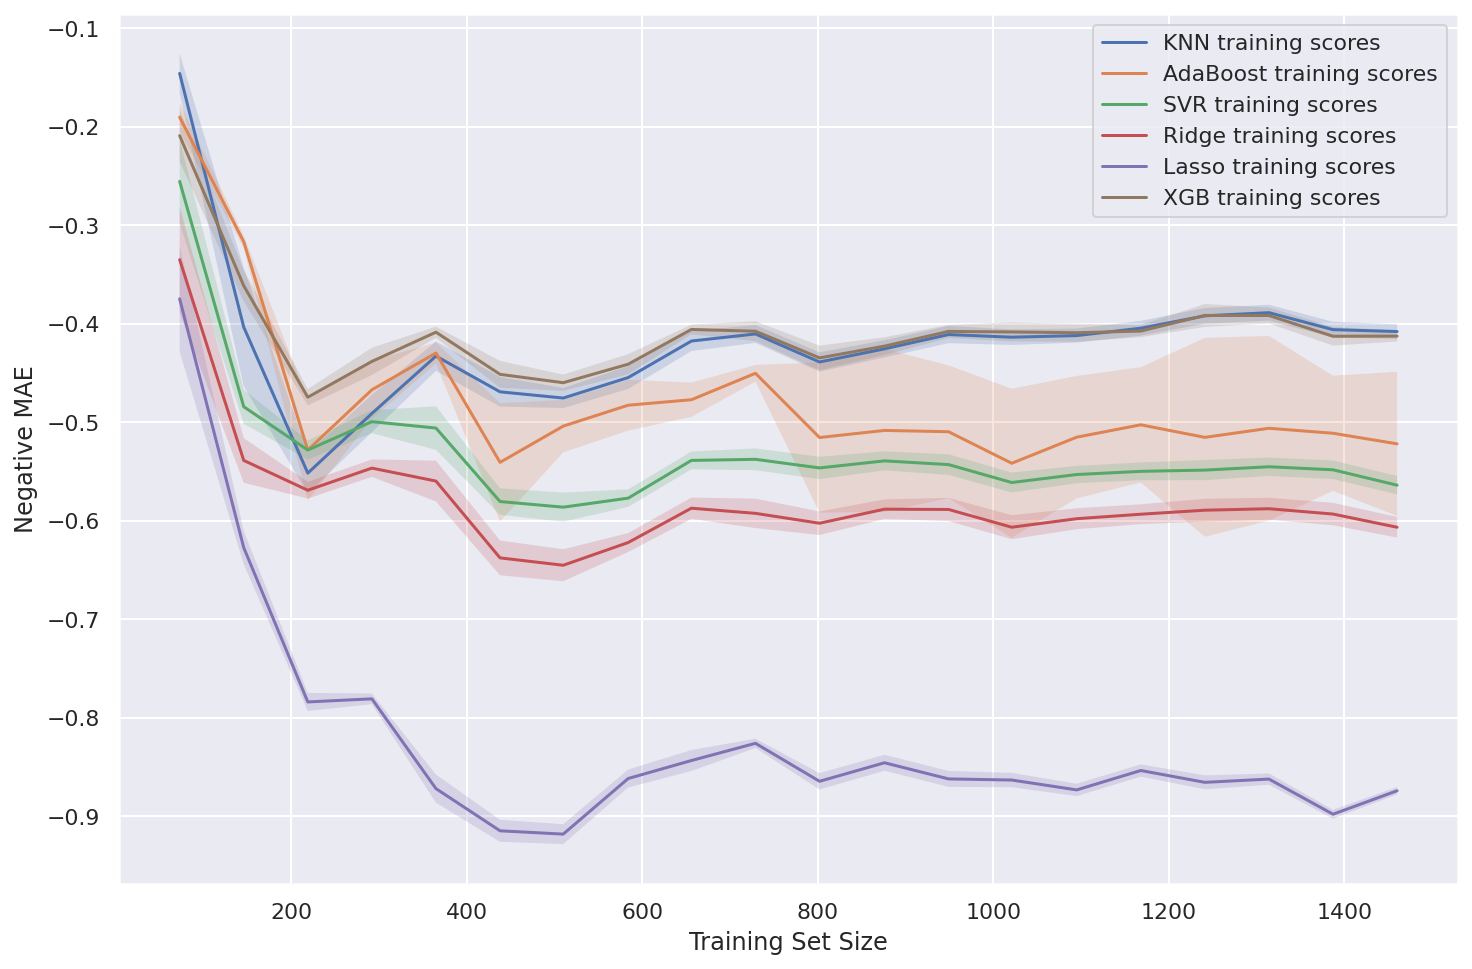

In [72]:
plt.figure(figsize=(12,8))
plot_learning_curve(knn,X,y,'KNN')
plot_learning_curve(adaboost,X,y,'AdaBoost')
plot_learning_curve(svr,X_transformed,y_transformed,'SVR')
plot_learning_curve(ridge,X_transformed,y_transformed,'Ridge')
plot_learning_curve(lasso,X_transformed,y_transformed,'Lasso')
plot_learning_curve(xgb,X,y,'XGB')
